#Clone roop repo and install dependencies

In [1]:
!git clone https://github.com/s0md3v/roop.git
%cd roop
!pip install -r requirements.txt

Cloning into 'roop'...
remote: Enumerating objects: 1537, done.
remote: Total 1537 (delta 0), reused 0 (delta 0), pack-reused 1537
Receiving objects: 100% (1537/1537), 97.43 MiB | 43.23 MiB/s, done.
Resolving deltas: 100% (916/916), done.
/content/roop
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
Ignoring tkinterdnd2-universal: markers 'sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
Ignoring onnxruntime: markers 'python_version != "3.9" and sys_platform == "darwin" and platform_machine != "arm64"' don't match your environment
Ignoring onnxruntime-coreml: markers 'python_version == "3.9" and sys_platform == "darwin" and platform_machine != "arm64"' don't match your environment
Ignoring onnxruntime-silicon: markers 'sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

#download model

In [2]:
!wget https://huggingface.co/ezioruan/inswapper_128.onnx/resolve/main/inswapper_128.onnx -O inswapper_128.onnx
!mkdir models
!mv inswapper_128.onnx ./models

--2024-02-24 19:00:57--  https://huggingface.co/ezioruan/inswapper_128.onnx/resolve/main/inswapper_128.onnx
Resolving huggingface.co (huggingface.co)... 65.8.178.93, 65.8.178.12, 65.8.178.27, ...
Connecting to huggingface.co (huggingface.co)|65.8.178.93|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/40/3c/403ce23d3f5c02a28fcbe749205d5c8245b2812e6c948bae7abac24495779bc7/e4a3f08c753cb72d04e10aa0f7dbe3deebbf39567d4ead6dce08e98aa49e16af?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27inswapper_128.onnx%3B+filename%3D%22inswapper_128.onnx%22%3B&Expires=1709058138&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwOTA1ODEzOH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy80MC8zYy80MDNjZTIzZDNmNWMwMmEyOGZjYmU3NDkyMDVkNWM4MjQ1YjI4MTJlNmM5NDhiYWU3YWJhYzI0NDk1Nzc5YmM3L2U0YTNmMDhjNzUzY2I3MmQwNGUxMGFhMGY3ZGJlM2RlZWJiZjM5NTY3ZDRlYWQ2ZGNlMDhlOThhYTQ5ZTE2Y

#GPU support

In [3]:
!pip uninstall onnxruntime onnxruntime-gpu -y
!pip install torch torchvision torchaudio --force-reinstall --index-url https://download.pytorch.org/whl/cu118
!pip install onnxruntime-gpu

Found existing installation: onnxruntime-gpu 1.15.1
Uninstalling onnxruntime-gpu-1.15.1:
  Successfully uninstalled onnxruntime-gpu-1.15.1
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.2/819.2 MB 905.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 53.3 MB/s eta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 MB 6.2 MB/s eta 0:00:00


#Deepfake

In [5]:
!python run.py --target /content/Hermione.jpg  --source /content/taylorSwift.jpg -o /content/taylorAsHermoine.jpg --execution-provider cuda --frame-processor face_swapper face_enhancer

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Downloading: 529MB [00:02, 207MB/s]               
Downloading: 332MB [00:02, 126MB/s]               
download_path: /root/.insightface/models/buffalo_l
100% 281857/281857 [00:04<00:00, 70200.47KB/s]
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx 

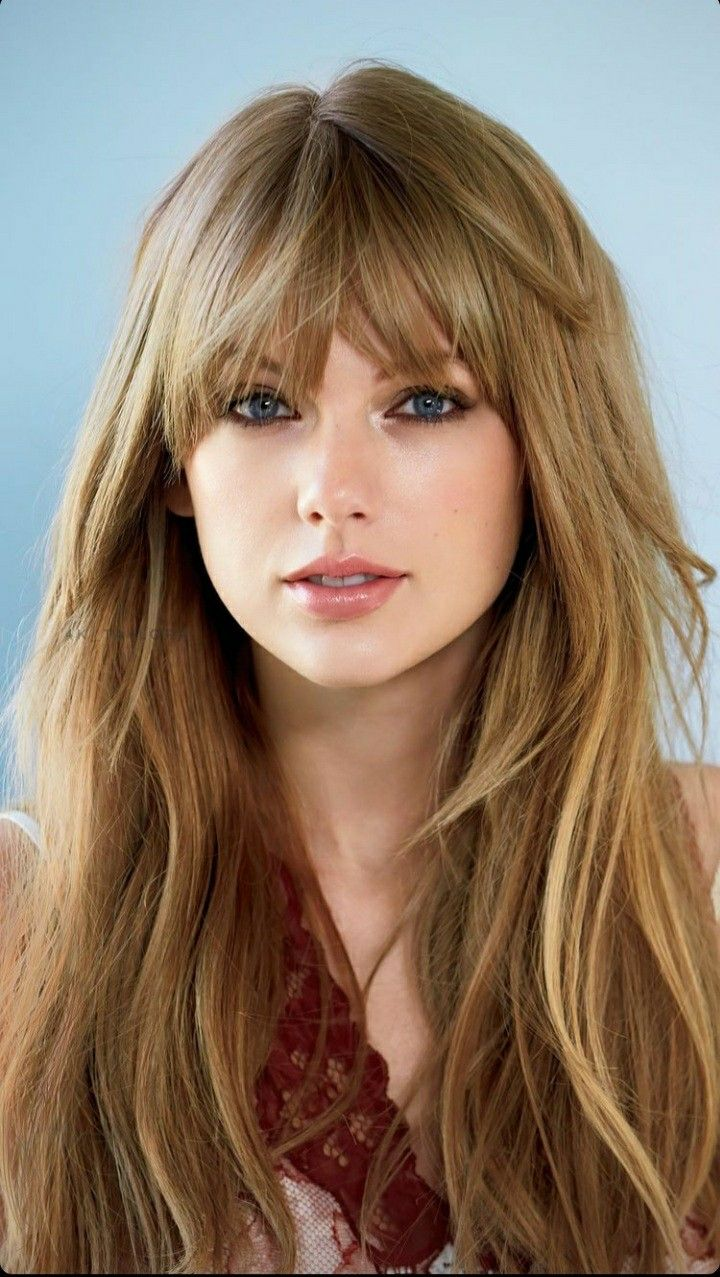

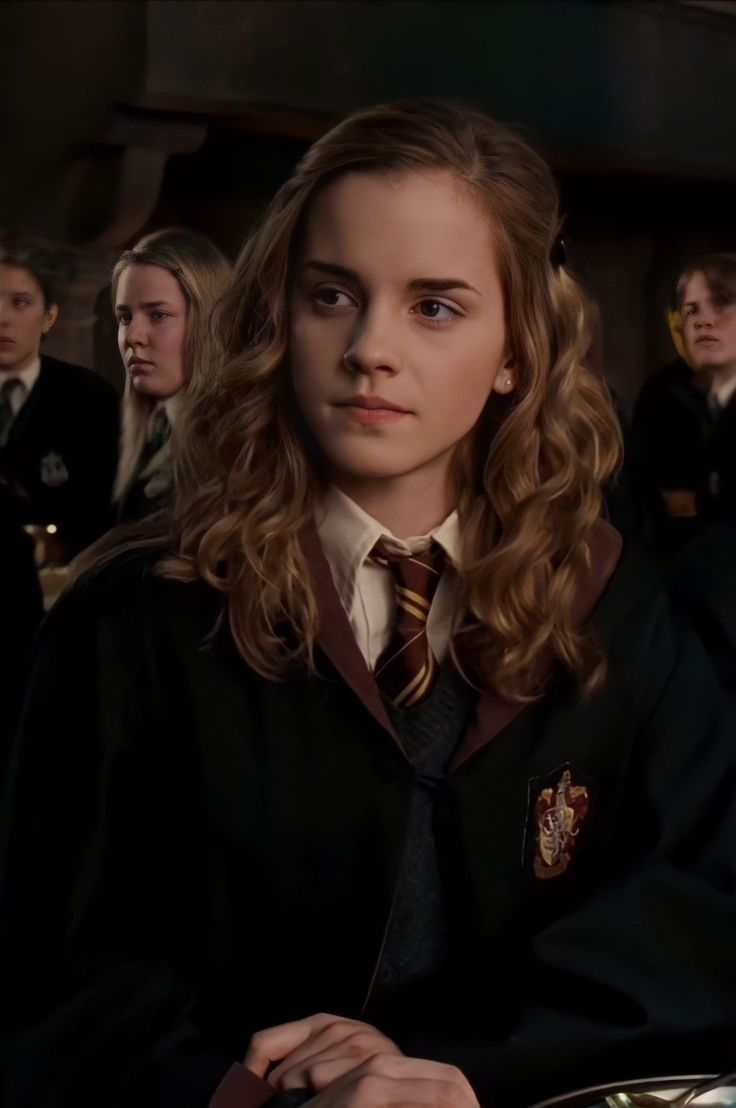

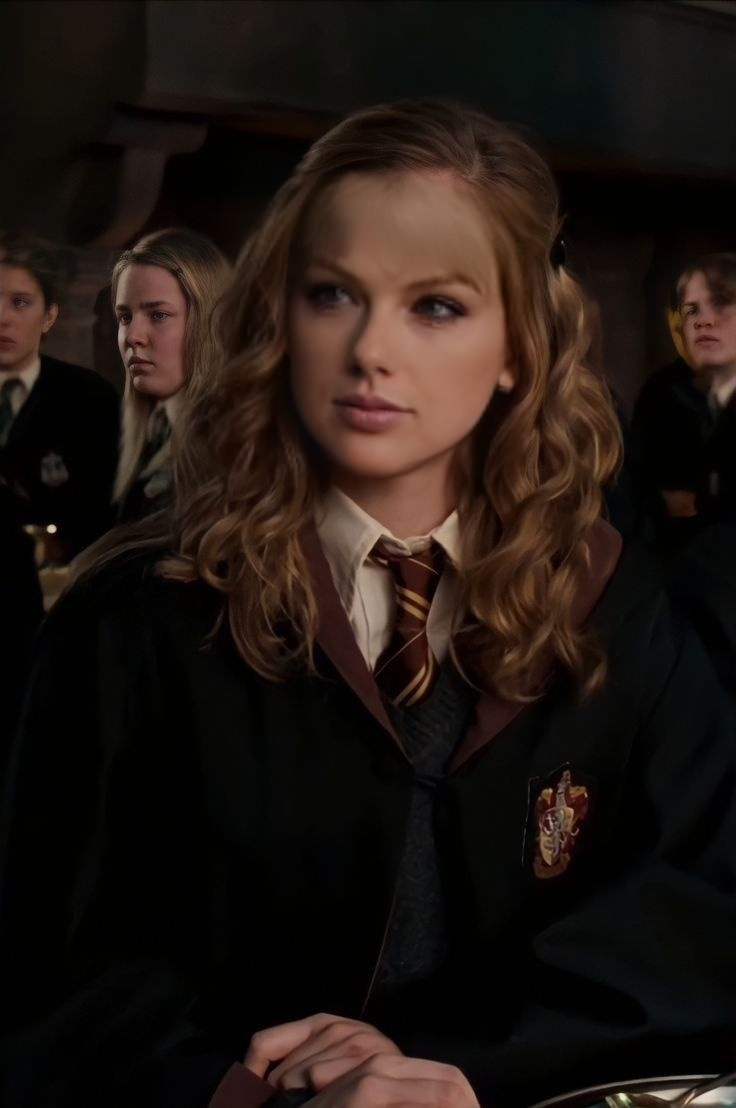

In [6]:
import cv2
from google.colab.patches import cv2_imshow

# target /content/Hermione.jpg  --source /content/taylorSwift.jpg -o /content/taylorAsHermoine.jpg

srcimg =cv2.imread('/content/taylorSwift.jpg')
targetimg =  cv2.imread('/content/Hermione.jpg')
optimg= cv2.imread('/content/taylorAsHermoine.jpg')

cv2_imshow(srcimg)
cv2_imshow(targetimg)
cv2_imshow(optimg)

In [7]:
!python run.py --target /content/target1.mp4  --source /content/taylorSwift.jpg -o /content/taylorAswoman.mp4 --execution-provider cuda --frame-processor face_swapper face_enhancer

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage 

In [9]:
!python run.py --target /content/taylorSwift.jpg  --source /content/Hermione.jpg -o /content/HermoineAStaylor.jpg --execution-provider cuda --frame-processor face_swapper face_enhancer

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage 

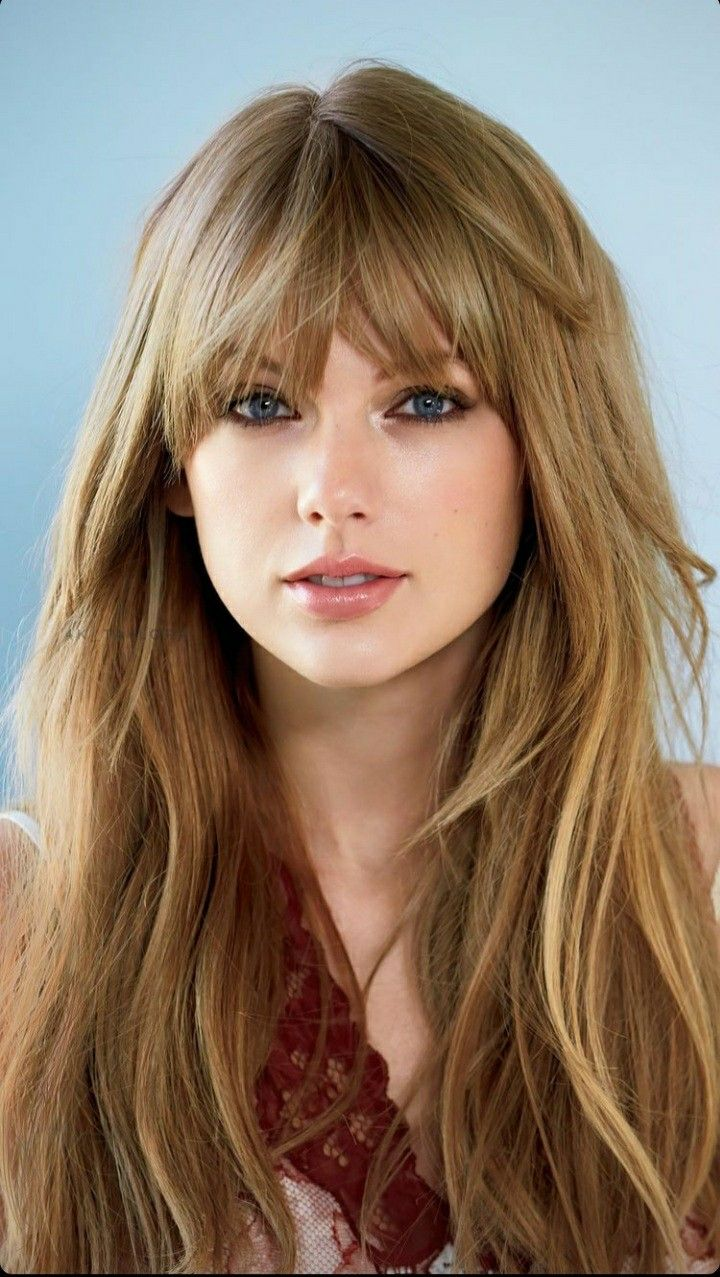

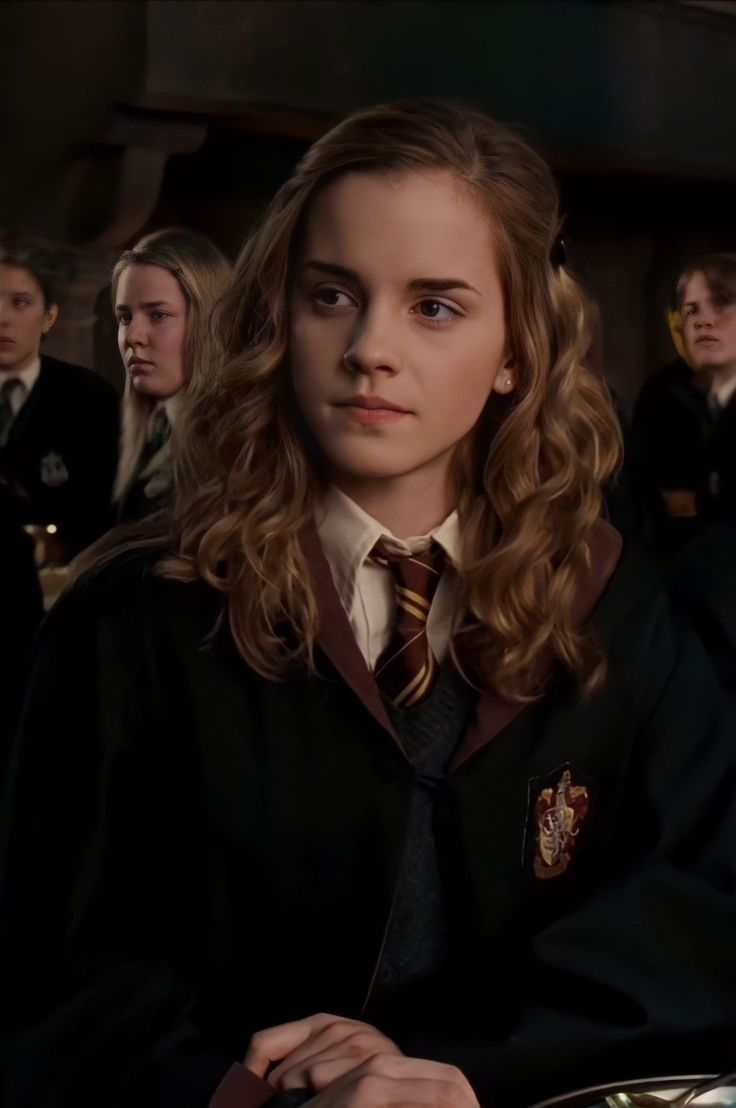

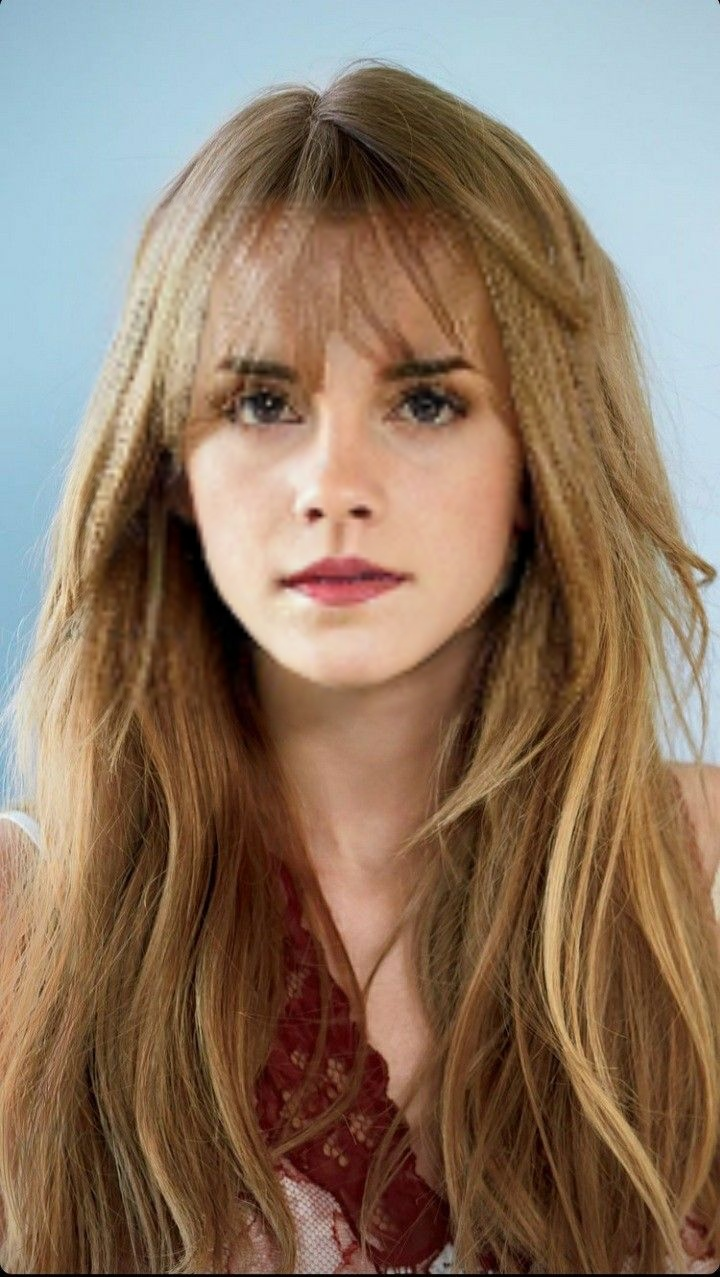

In [10]:
srcimg =cv2.imread('/content/taylorSwift.jpg')
targetimg =  cv2.imread('/content/Hermione.jpg')
optimg= cv2.imread('/content/HermoineAStaylor.jpg')

cv2_imshow(srcimg)
cv2_imshow(targetimg)
cv2_imshow(optimg)

In [ ]:
!python run.py --target /content/woman_short.mp4  --source /content/taylorSwift.jpg -o /content/taylorAswoman.mp4 --execution-provider cuda --frame-processor face_swapper face_enhancer --temp-frame-quality 75 --output-video-quality 75